# 데이터 분석 순서

1. 데이터 준비
  - 기본적인 데이터 살펴보기
  - 결측치 살펴보기

2. EDA
  - 전체적인 데이터 살펴보기
  - 바 차트
  - 상관 관계 히트맵

3. 피처엔지니어링
  - 독립 변수와 종속 변수 분리

4. 모델 학습 및 평가지표 확인
  - 모델 학습
  - 평가 지표

5. 팀과 모델링 결과 발표후 고성능 모델 선정

6. 선택된 모델로 학습 진행

7. 학습 진행 후 결과 제출

8. 캐글 성적 확인


# 1. 데이터 준비

## 모듈과 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train      = pd.read_csv( '/content/drive/MyDrive/멋사_데이터분석스쿨/9.파이널_프로젝트/Binary Classification with a Tabular Reservation Cancellation Dataset/train.csv' )
test       = pd.read_csv( '/content/drive/MyDrive/멋사_데이터분석스쿨/9.파이널_프로젝트/Binary Classification with a Tabular Reservation Cancellation Dataset/test.csv' )
submission = pd.read_csv( '/content/drive/MyDrive/멋사_데이터분석스쿨/9.파이널_프로젝트/Binary Classification with a Tabular Reservation Cancellation Dataset/sample_submission.csv' )

train.shape, test.shape, submission.shape

# 테스트 데이터 수와 제출용 데이터 수는 동일
# 훈련 데이터 -> 학습 -> 모델 -> 테스트 데이터 주입 -> 예측 -> 제출
# 훈련 피처 수가 14, 테스트 데이터의 피처 수 13 => 1 개 차이

((42100, 19), (28068, 18), (28068, 2))

## 기본적인 데이터 확인

In [ ]:
# 결측, 타입 체크
# 정답은 정수형이지만 예측 값은 부동 소수로 처리될 듯
train.info( ), test.info( ), submission.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

(None, None, None)

In [ ]:
train.head( )

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [ ]:
test.head( )

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [3]:
train.describe( ).T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

## 결측치 살펴보기

In [ ]:
print( train.isnull( ) ,'--' * 50, test.isnull( ), '--' * 50, submission.isnull( ) )

          id  no_of_adults  no_of_children  no_of_weekend_nights  \
0      False         False           False                 False   
1      False         False           False                 False   
2      False         False           False                 False   
3      False         False           False                 False   
4      False         False           False                 False   
...      ...           ...             ...                   ...   
42095  False         False           False                 False   
42096  False         False           False                 False   
42097  False         False           False                 False   
42098  False         False           False                 False   
42099  False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False                       False   
1                  False         

# 2. EDA

- 데이터 변환과 EDA는 아래 링크에서 진행
- [데이터 변환과 EDA](https://colab.research.google.com/drive/10QxT7BN3hAJssFy0e6URItHOrO1uC-J2#scrollTo=LORzF4TCPFBx)

## 전체적인 데이터 살펴보기

In [ ]:
# 컬럼 확인
train.columns, test.columns, submission.columns

# 종속 변수: 'Machine failure'
# 제출     : 'id', 'Machine failure' 기입

(Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
        'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
       dtype='object'),
 Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
        'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests'],
       dtype='object'),
 Index(['id', 'booking_status'], dtype='object'))

In [ ]:
# 샘플 값 확인, 필요 시 피처 요약표 사용 가능
'''

- 독립변수
  id                                      데이터 포인트       int64
  no_of_adults                            성인 수             int64
  no_of_children                          어린이 수           int64
  no_of_weekend_nights                    주말 숙박 일수      int64
  no_of_week_nights                       평일 숙박 일수      int64
  type_of_meal_plan                       조식 여부           int64
  required_car_parking_space              주차 여부           int64
  room_type_reserved                      예약 객실 유형      int64
  lead_time                               리드 타임           int64
  arrival_year                            방문 연도           int64
  arrival_month                           방문 월             int64
  arrival_date                            방문 일자           int64
  market_segment_type                     시장 분류 종류      int64
  repeated_guest                          반복 방문 고객      int64
  no_of_previous_cancellations            예약 취소 횟수      int64
  no_of_previous_bookings_not_canceled    예약 횟수           int64
  avg_price_per_room                      평균 객실 금액      float64
  no_of_special_requests                  특별 요청 횟수      int64

- 종속변수
  booking_status                          현재 예약 상태      int64

'''
train

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


In [ ]:
test

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [ ]:
submission

,id,booking_status
0,42100,0.392
1,42101,0.392
2,42102,0.392
3,42103,0.392
4,42104,0.392
...,...,...
28063,70163,0.392
28064,70164,0.392
28065,70165,0.392
28066,70166,0.392


### 범주형 변수 - 타겟 변수의 모든 표 형식

In [ ]:
for i, feature in enumerate( cate_features ):
  if i != 9:
    print( f'{ feature }' )
    display_tabular_relationship_cate_target( train, feature )
    print( '\n' )

no_of_adults


no_of_adults,0,1,2,3,4
booking_status,,,,,
0,0.645299,0.73463,0.604239,0.597006,0.631579
1,0.354701,0.26537,0.395761,0.402994,0.368421




no_of_children


no_of_children,0,1,2,3,4,9
booking_status,,,,,,
0,0.629351,0.622636,0.580998,0.814815,0.8,0.75
1,0.370649,0.377364,0.419002,0.185185,0.2,0.25




type_of_meal_plan


type_of_meal_plan,0,1,2,3
booking_status,,,,
0,0.641479,0.541978,0.585933,0.888889
1,0.358521,0.458022,0.414067,0.111111




required_car_parking_space


required_car_parking_space,0,1
booking_status,,
0,0.619795,0.898595
1,0.380205,0.101405




room_type_reserved


room_type_reserved,0,1,2,3,4,5,6
booking_status,,,,,,,
0,0.629959,0.610143,0.67661,0.5838,0.733634,0.857678,0.666667
1,0.370041,0.389857,0.32339,0.4162,0.266366,0.142322,0.333333




arrival_year


arrival_year,2017,2018
booking_status,,
0,0.833047,0.589811
1,0.166953,0.410189




market_segment_type


market_segment_type,0,1,2,3,4
booking_status,,,,,
0,0.755372,0.5375,0.883962,0.766917,0.989062
1,0.244628,0.4625,0.116038,0.233083,0.010937




repeated_guest


repeated_guest,0,1
booking_status,,
0,0.616962,0.989311
1,0.383038,0.010689




no_of_special_requests


no_of_special_requests,0,1,2,3,4,5
booking_status,,,,,,
0,0.536969,0.713046,0.796362,0.994914,1.0,1.0
1,0.463031,0.286954,0.203638,0.005086,0.0,0.0


### 예약 상태와 특성

<Figure size 1200x800 with 0 Axes>

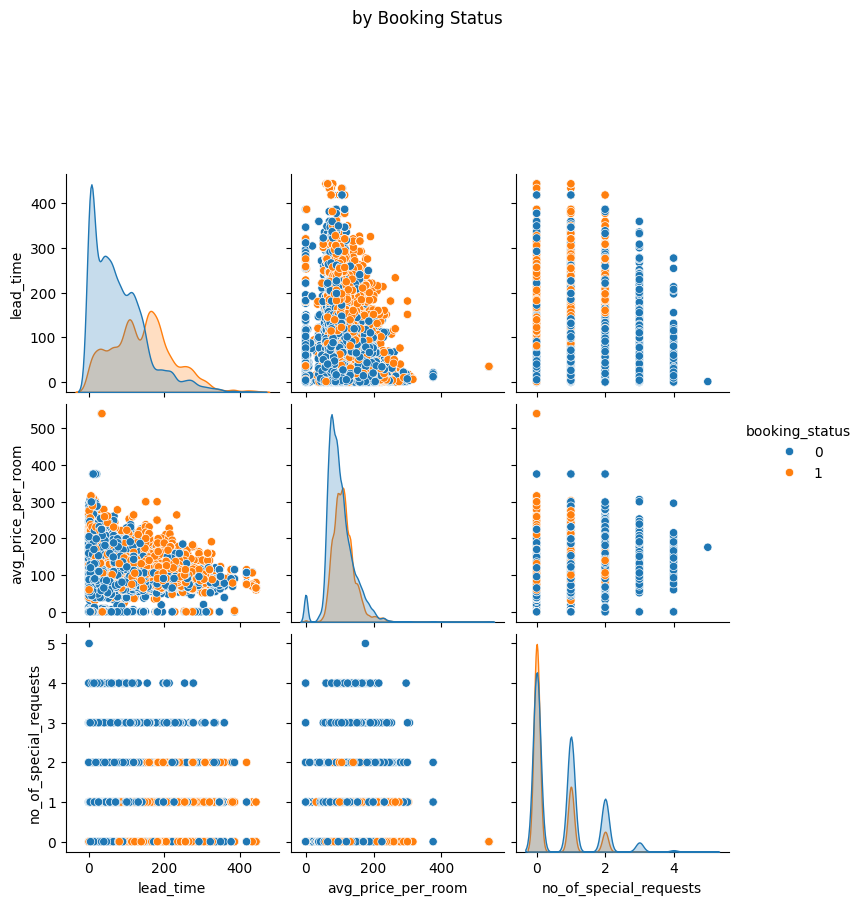

In [ ]:
plt.figure( figsize = ( 12, 8 ) )
sns.pairplot( train[ [ 'lead_time', 'avg_price_per_room', 'no_of_special_requests', 'booking_status' ] ], hue = 'booking_status' )
plt.suptitle( 'by Booking Status', y = 1.2 )
plt.show( )

## 바 차트

In [ ]:
target = train[ 'booking_status' ]

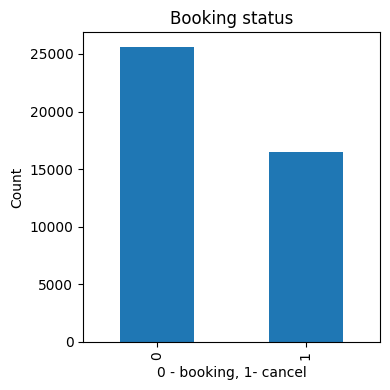

In [ ]:
ax = target.value_counts().plot.bar(figsize=(4, 4), legend=False)
ax.set_title('Booking status')
ax.set_xlabel('0 - booking, 1- cancel')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

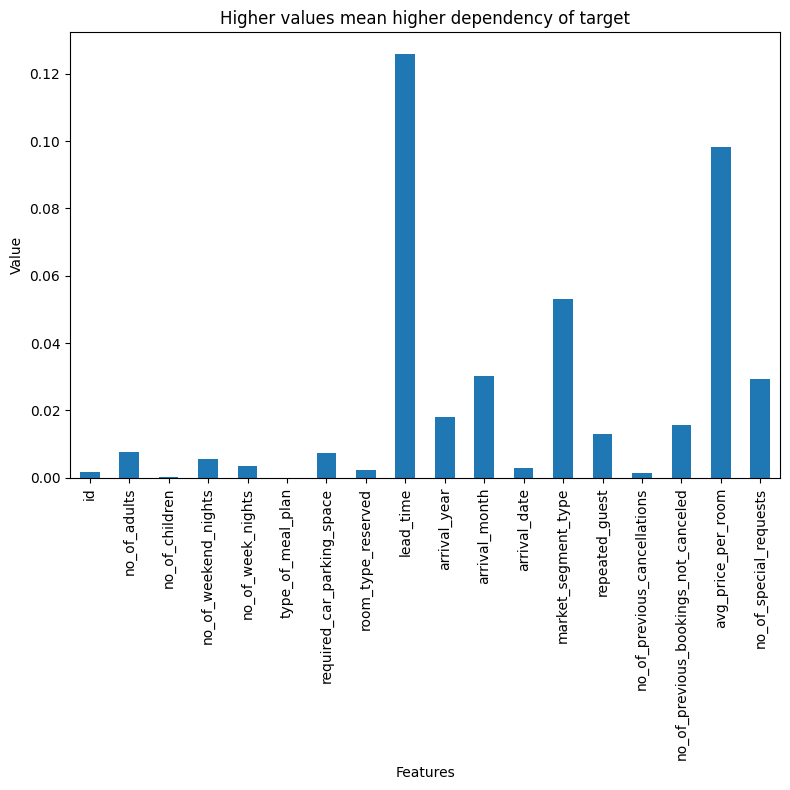

In [ ]:
fe_mi = train.drop( columns = [ 'booking_status' ] ).columns.to_list( )
mi = mutual_info_classif( train[ fe_mi ], train[ 'booking_status' ].values,
                          discrete_features = 'auto', n_neighbors = 3,
                          copy = True, random_state = None )

df_mi = pd.DataFrame( [ mi ], columns = fe_mi )


ax = df_mi.transpose( ).plot.bar( figsize = ( 8, 8 ), legend = False )
ax.set_xlabel( 'Features' )
ax.set_ylabel( 'Value' )
ax.set_title( 'Higher values mean higher dependency of target' )
plt.tight_layout( )
plt.show( )

In [ ]:
# 에러코드 무시
import warnings
warnings.filterwarnings( 'ignore' )

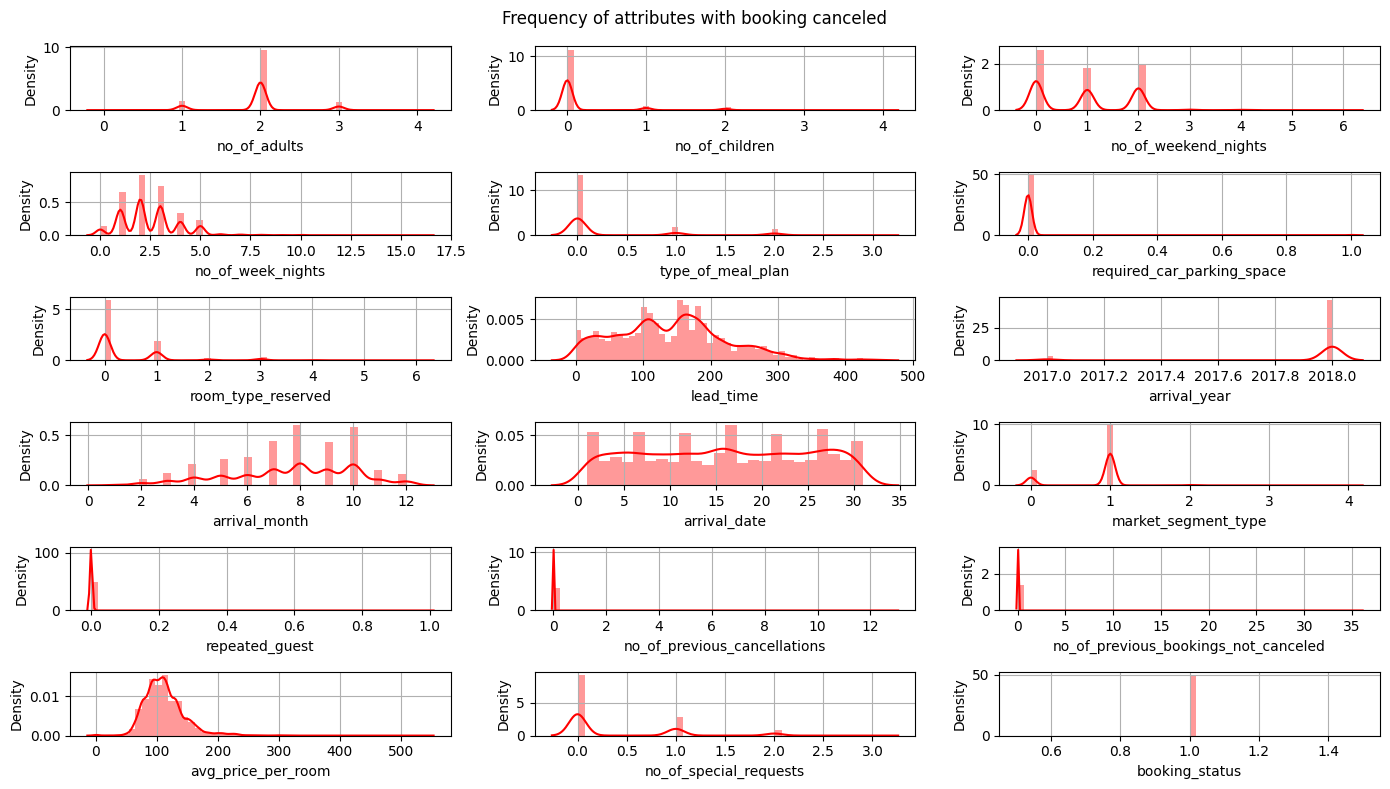

In [ ]:
plt.figure( figsize = ( 14, 8 ) )
plt.suptitle( 'Frequency of attributes with booking canceled' )

# train 데이터프레임에서 booking_status가 1( 예약 취소 )인 행만을 선택하여 temp에 저장
temp = train[ train.booking_status == 1 ]

for i, col in enumerate( list( temp.iloc[ : , 1 : ].columns.values ) ):
  plt.subplot( 6, 3, i + 1 )
  sns.distplot( temp[ col ], color = 'r', kde = True )
  plt.grid( )
  plt.tight_layout( )

In [ ]:
cate_features = [
    'no_of_adults',
    'no_of_children',
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'arrival_year',
    'market_segment_type',
    'repeated_guest',
    'no_of_special_requests',
    'booking_status' ]
numeric_features = list( set ( train.columns )  - set( cate_features ) )

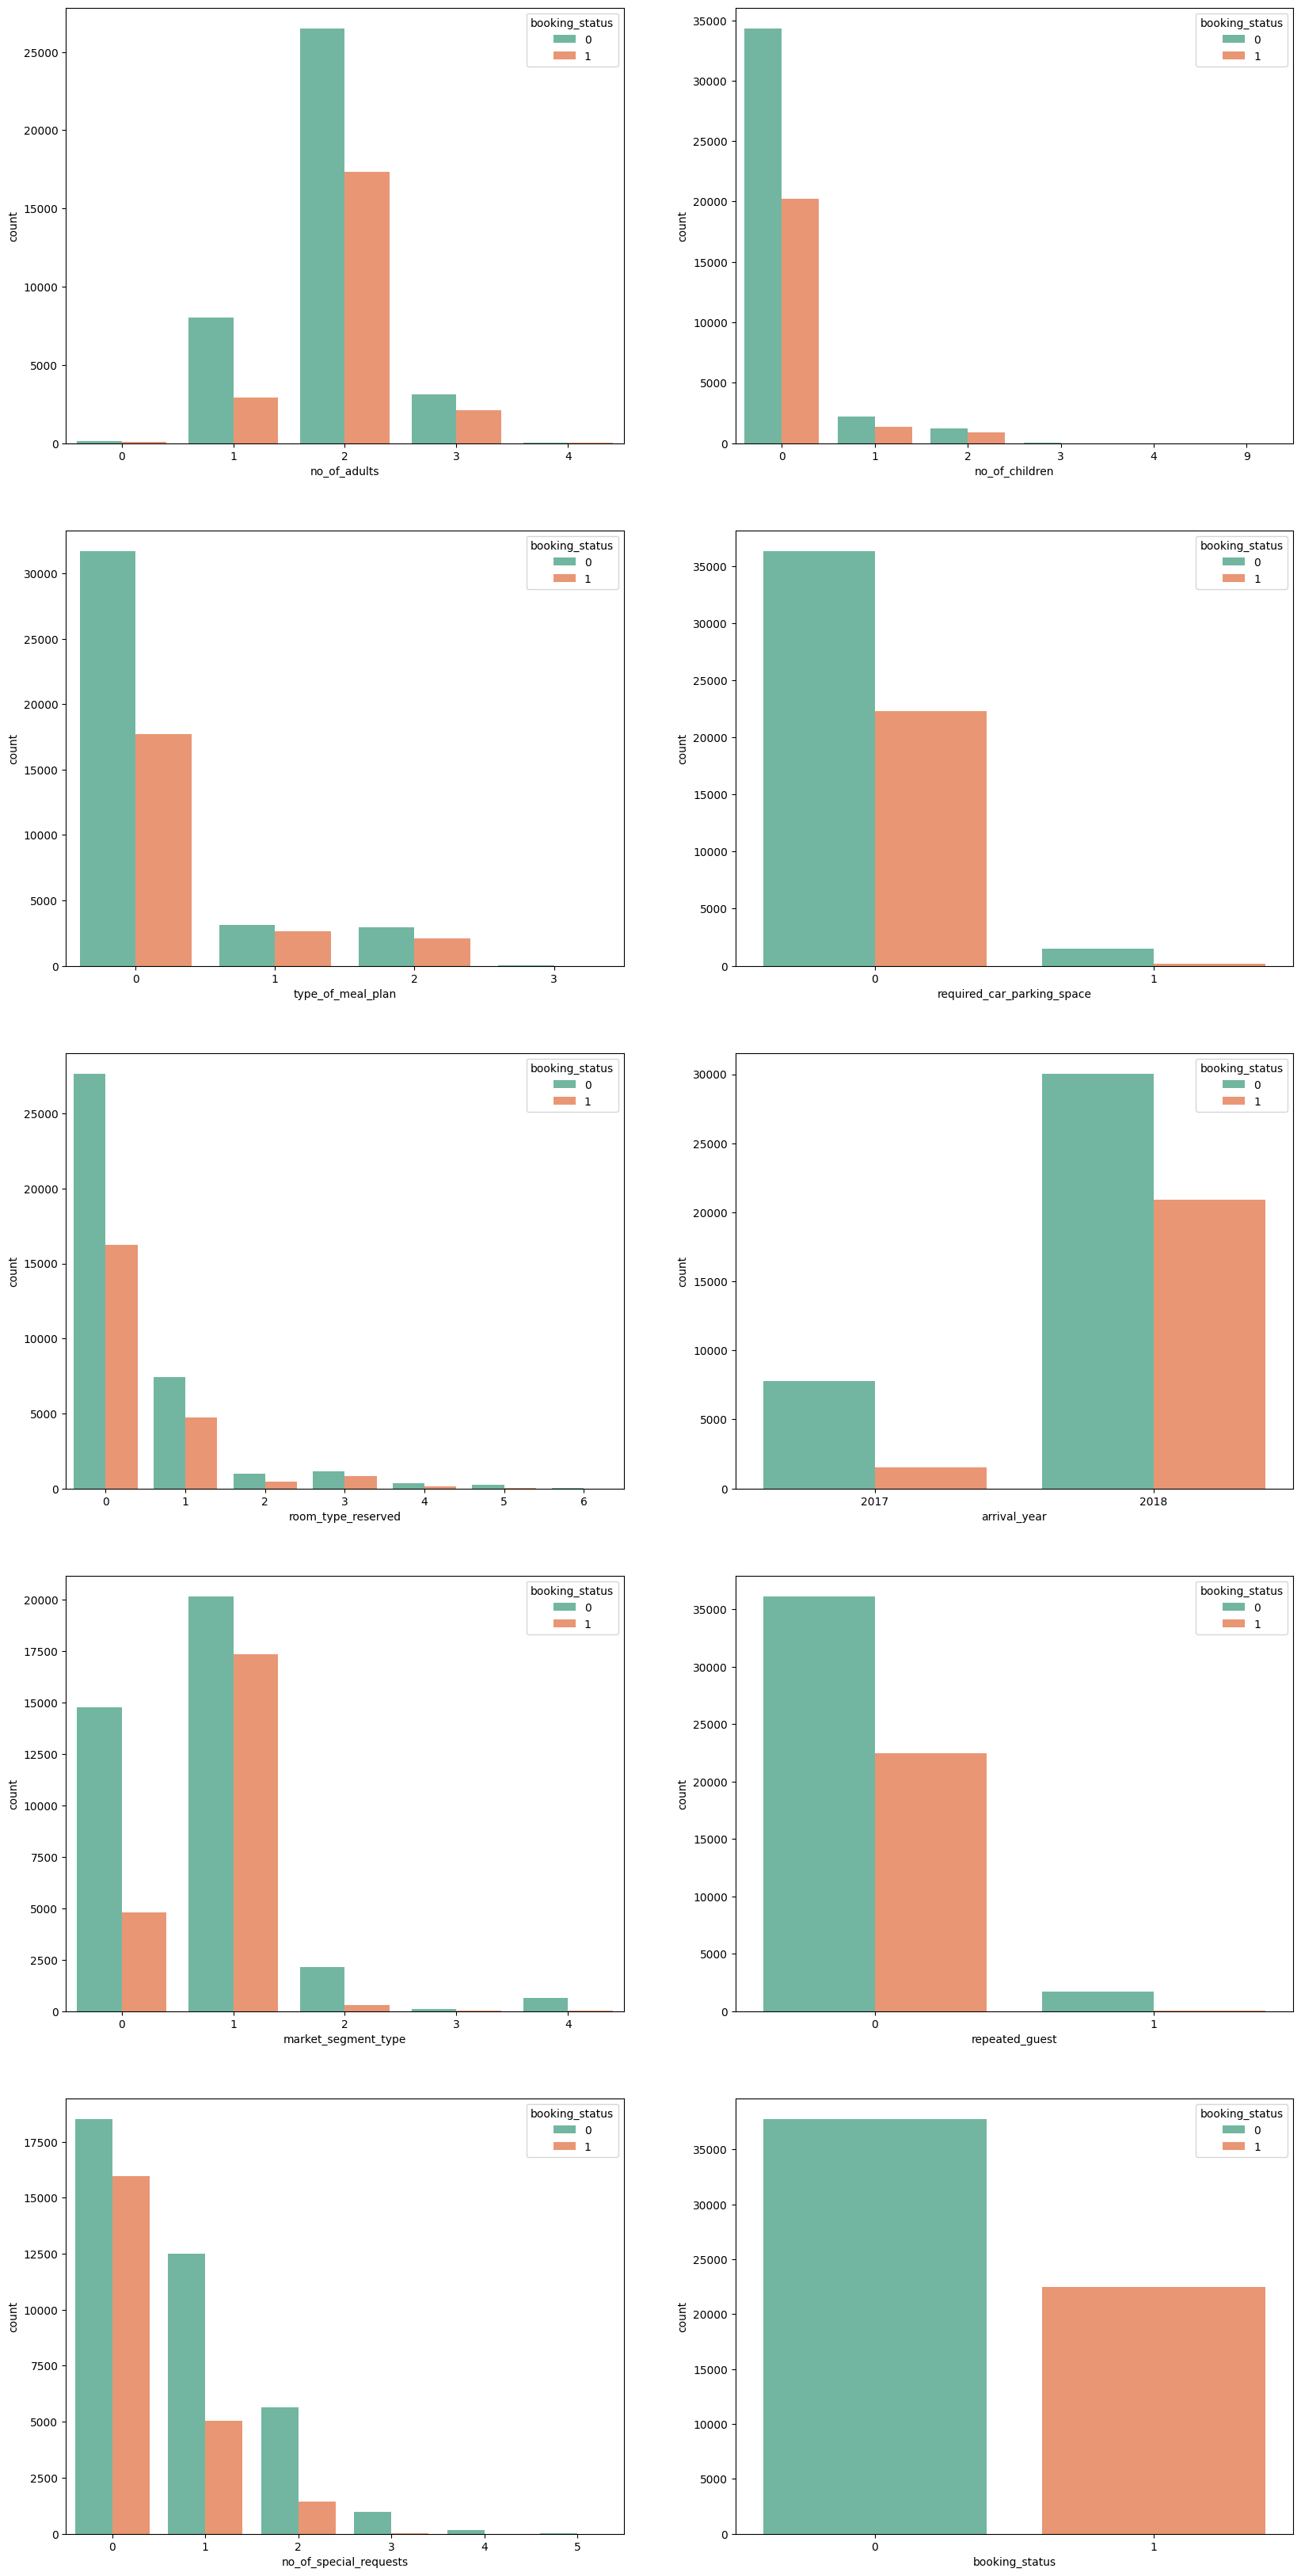

In [ ]:
plt.figure( figsize = ( 20, 50 ) )
sns.set_palette( 'Set2' )

for i, feature in enumerate( cate_features ):
    plt.subplot( len( cate_features ) // 2 + 1, 2, i + 1 )
    sns.countplot( data = train, x = feature, hue = 'booking_status' )
plt.show( )

### 예약 상태와 도착 달

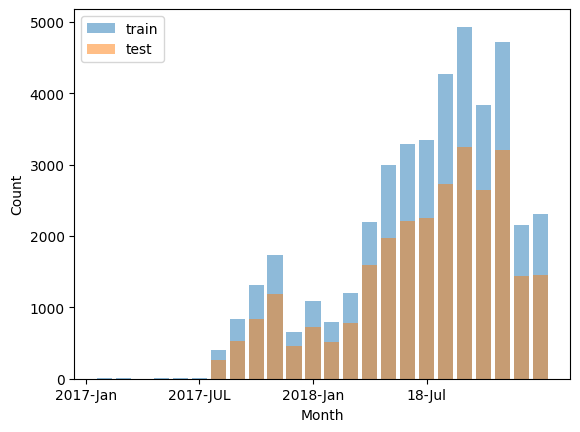

In [ ]:
temp = ( ( train.arrival_year - 2017 ) * 12 + train.arrival_month ).value_counts( )
plt.bar( temp.index, temp, alpha=0.5, label='train' )
temp = ( ( test.arrival_year - 2017 ) * 12 + test.arrival_month ).value_counts( )
plt.bar( temp.index, temp, alpha=0.5, label='test' )
plt.xticks( [ 0, 6, 12, 18 ], [ '2017-Jan', '2017-JUL', '2018-Jan', '18-Jul' ] )
plt.xlabel( 'Month' )
plt.ylabel( 'Count' )
plt.legend( )
plt.show( )

## 박스플롯

In [ ]:
df = train.loc[:, [ 'room_type_reserved', 'no_of_adults', 'no_of_children', 'lead_time' ] ]
df

,room_type_reserved,no_of_adults,no_of_children,lead_time
0,0,2,0,9
1,0,2,0,117
2,0,2,0,315
3,0,1,0,32
4,0,2,0,258
...,...,...,...,...
42095,1,3,0,160
42096,0,2,0,34
42097,0,2,0,292
42098,0,1,0,5


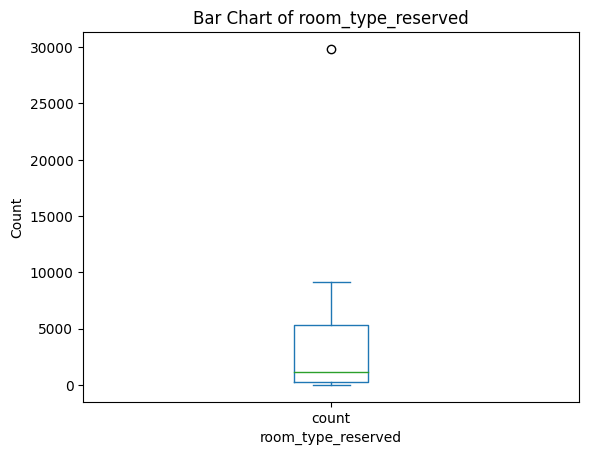

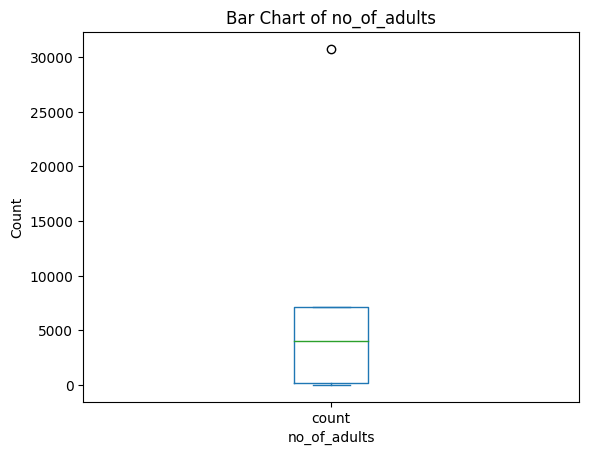

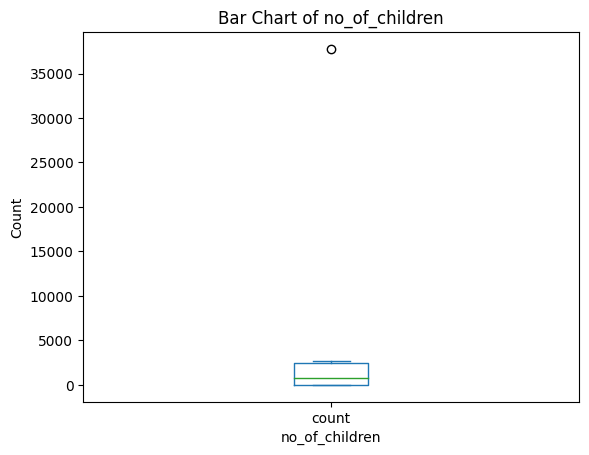

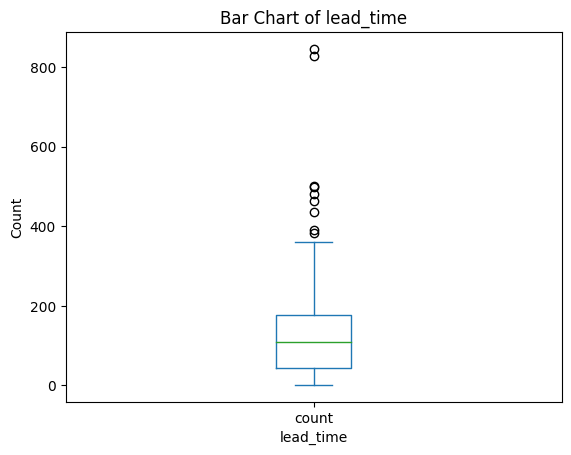

In [ ]:
for column in df.columns:
    df[ column ].value_counts( ).plot( kind = 'box' )
    plt.title( f'Bar Chart of {column}' )
    plt.xlabel( column )
    plt.ylabel( 'Count' )
    plt.show( )

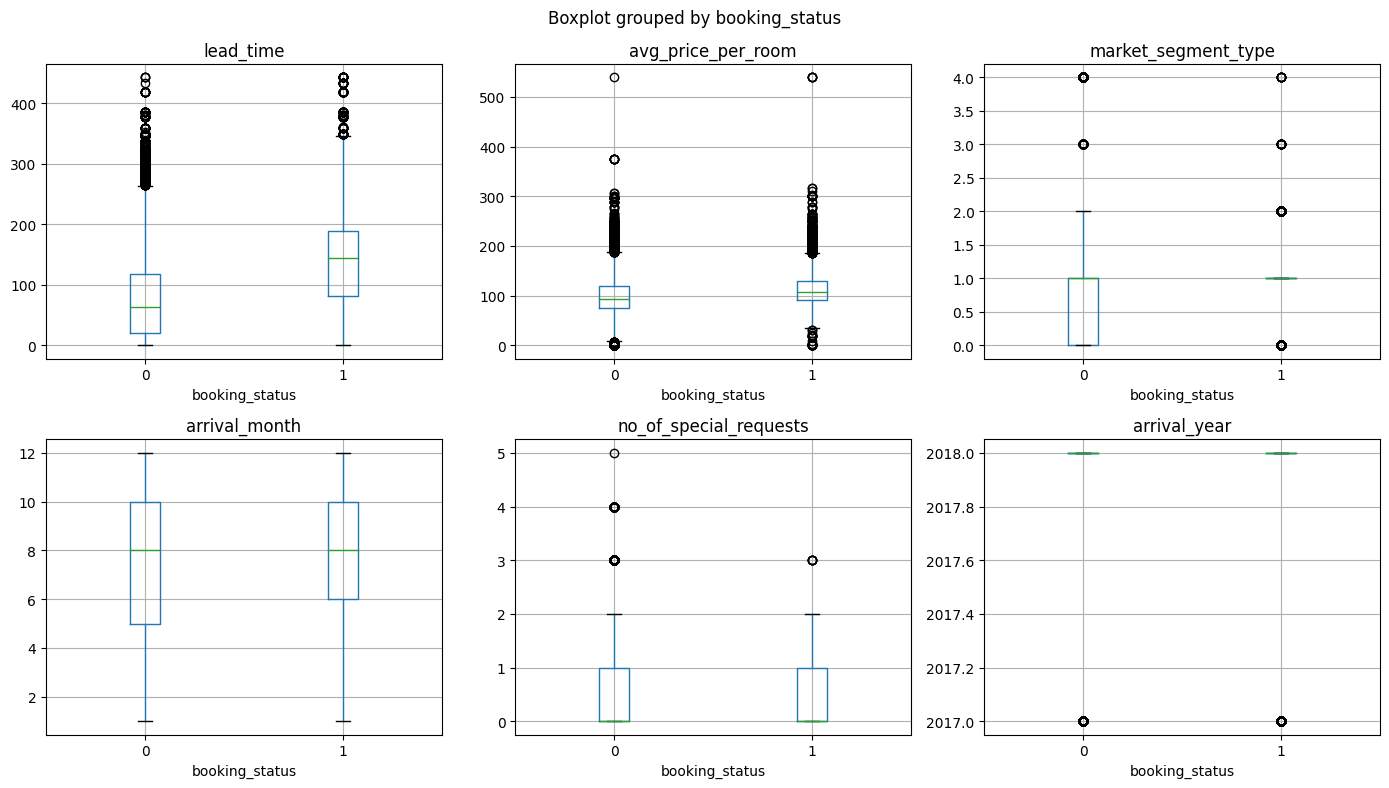

In [ ]:
temp = df_mi.T.rename( columns = { 0 : 'value'} )
feat_hi_depend = temp.nlargest( 6,'value' ).index.tolist( )

fig, axes = plt.subplots( 2, 3,figsize = ( 14, 8 ) )

for i,el in enumerate( feat_hi_depend ):
  a = train.boxplot( el, by = 'booking_status', ax = axes.flatten( )[ i ] )

plt.tight_layout( )
plt.show( )

## 상관 관계 히트맵

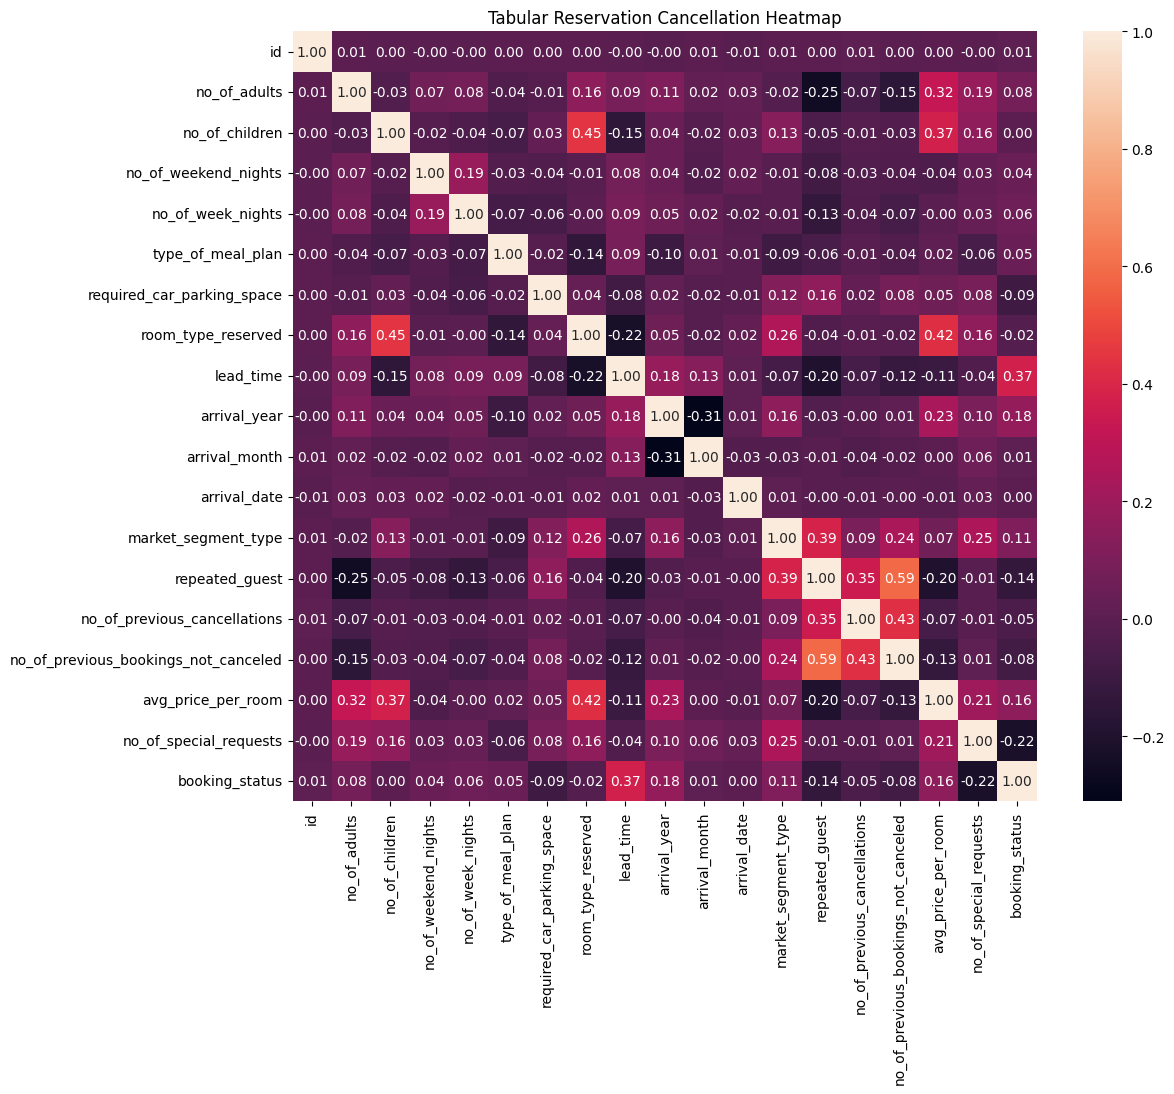

In [ ]:
# 상관 관계 계산
correlation = train.corr( )

# 상관관계 히트맵 그리기
plt.figure( figsize = ( 12, 10 ) )
sns.heatmap( correlation, annot = True, fmt = ".2f" )
plt.title( 'Tabular Reservation Cancellation Heatmap' )
plt.show( )

# 3. 피처엔지니어링

In [ ]:
# 독립변수와 종속변수 분리
X = train.drop( columns = [ 'id', 'booking_status' ] )
y = train[ 'booking_status' ]

In [ ]:
# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                     test_size = 0.2,
                                                     random_state = 42,
                                                     shuffle = True )

In [ ]:
# 특성 스케일링
scaler = StandardScaler( )
X_train_scaled = scaler.fit_transform( X_train )
X_test_scaled = scaler.transform( X_test )

# 4. 모델학습

## DecisonTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 초기화
model_dt = DecisionTreeClassifier( random_state = 42 )
model_dt.fit( X_train_scaled, y_train )

DecisionTreeClassifier(random_state=42)

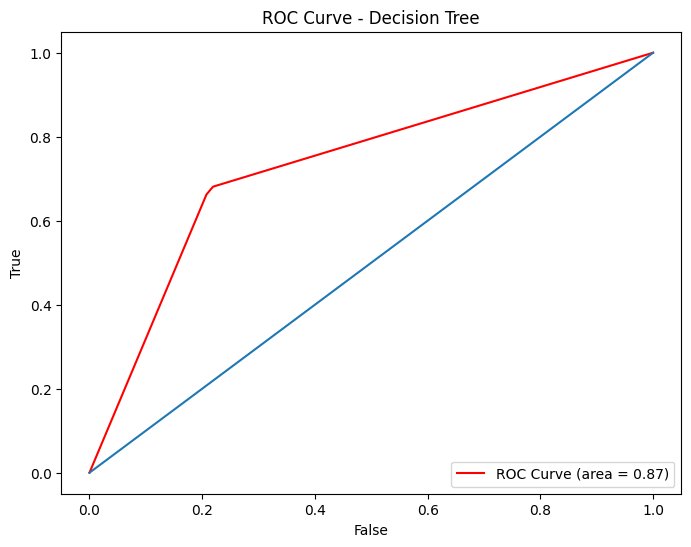

ROC AUC Score (Decision Tree): 0.7328307057391408


In [ ]:
# 테스트 데이터에서 예측 확률 계산
y_proba_dt = model_dt.predict_proba( X_test_scaled )[ : , 1 ]

# ROC 곡선 계산
fpr_dt, tpr_dt, thresholds_dt = roc_curve( y_test, y_proba_dt )

# ROC 곡선 그리기
plt.figure( figsize = ( 8, 6 ) )
plt.plot( fpr_dt, tpr_dt, color = 'red', label = 'ROC Curve (area = %.2f)' % roc_auc )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False' )
plt.ylabel( 'True' )
plt.title( 'ROC Curve - Decision Tree' )
plt.legend( loc = 'lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc_dt = roc_auc_score( y_test, y_proba_dt )
print( "ROC AUC Score (Decision Tree): ", roc_auc_dt )

## Decision Tree + GridSearchCV

Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score (Decision Tree): 0.8653564341945691


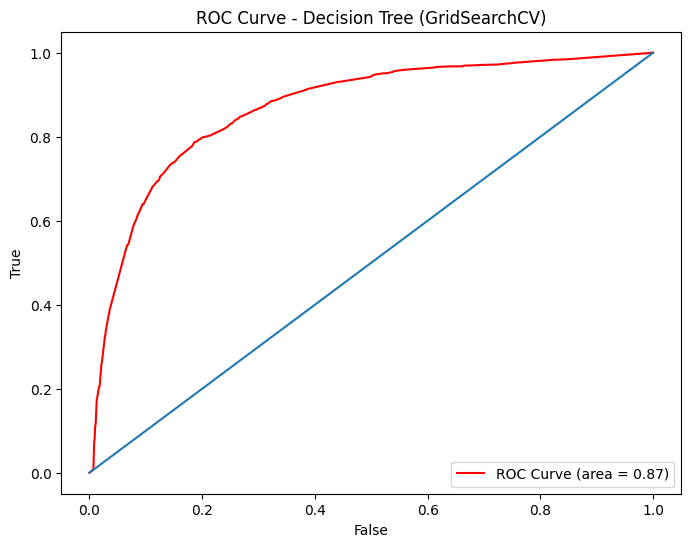

ROC AUC Score (Decision Tree - GridSearchCV): 0.8688137228704611


In [ ]:
model_dt_gs = DecisionTreeClassifier( random_state = 42 )
param_grid_dt = { 'max_depth' : [ None, 10, 20 ],
                  'min_samples_split' : [ 2, 5, 10 ],
                  'min_samples_leaf' : [ 1, 2, 4 ] }

# 그리드 서치 초기화
grid_search_dt = GridSearchCV( estimator = model_dt_gs,
                               param_grid = param_grid_dt,
                               cv=5, scoring = 'roc_auc',
                               n_jobs = -1 )

# 그리드 서치를 사용하여 모델 피팅
grid_search_dt.fit( X_train_scaled, y_train )

# 최적의 모델 및 매개 변수 출력
print( "Best Parameters (Decision Tree): ", grid_search_dt.best_params_ )
print( "Best Score (Decision Tree): ", grid_search_dt.best_score_ )

# 최적의 모델 할당
best_model_dt = grid_search_dt.best_estimator_

# 테스트 데이터에서 예측 확률 계산
y_proba_dt_gs = best_model_dt.predict_proba( X_test_scaled )[ : , 1 ]

# ROC 곡선 계산
fpr_dt_gs, tpr_dt_gs, thresholds_dt_gs = roc_curve( y_test, y_proba_dt_gs )

# ROC 곡선 그리기
plt.figure( figsize=(8, 6 ) )
plt.plot( fpr_dt_gs, tpr_dt_gs, color = 'red', label = 'ROC Curve (area = %.2f)'%roc_auc )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False' )
plt.ylabel( 'True' )
plt.title( 'ROC Curve - Decision Tree (GridSearchCV)' )
plt.legend( loc='lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc_dt_gs = roc_auc_score( y_test, y_proba_dt_gs )
print( "ROC AUC Score (Decision Tree - GridSearchCV): ", roc_auc_dt_gs )

## DecisionTree + GridSearch + XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 테스트 데이터로 예측
rf_y_pred_3 = best_model_3.predict( X_test )

In [ ]:
# 결정트리 모델 평가
dt_accuracy = accuracy_score( y_test, rf_y_pred_3 )
print( "DecisionTree Accuracy: ", dt_accuracy )

DecisionTree Accuracy:  0.8061163895486936


In [ ]:
# XGBoost 모델 정의
xgb_classifier = XGBClassifier( )

# XGBoost 모델 훈련
xgb_classifier.fit( X_train, y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 테스트 데이터로 예측
xgb_y_pred = xgb_classifier.predict( X_test )

# XGBoost 모델 평가
xgb_accuracy = accuracy_score( y_test, xgb_y_pred )
print( "XGBoost Accuracy: ", xgb_accuracy )

XGBoost Accuracy:  0.8187648456057007


## DecisionTree + GridSearch + XGBoost + CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# CatBoost 모델 정의
catboost_classifier = CatBoostClassifier( )

# CatBoost 모델 훈련
catboost_classifier.fit( X_train, y_train, verbose = 100 )  # verbose는 학습 과정 출력 여부를 결정합니다.

Learning rate set to 0.040905
0:	learn: 0.6728746	total: 9.51ms	remaining: 9.5s
100:	learn: 0.4259804	total: 887ms	remaining: 7.9s
200:	learn: 0.4096349	total: 1.77s	remaining: 7.03s
300:	learn: 0.3969919	total: 2.58s	remaining: 5.99s
400:	learn: 0.3863632	total: 3.42s	remaining: 5.11s
500:	learn: 0.3772776	total: 4.26s	remaining: 4.25s
600:	learn: 0.3695650	total: 5.79s	remaining: 3.84s
700:	learn: 0.3618185	total: 7.71s	remaining: 3.29s
800:	learn: 0.3550301	total: 8.99s	remaining: 2.23s
900:	learn: 0.3484637	total: 9.82s	remaining: 1.08s
999:	learn: 0.3425042	total: 10.7s	remaining: 0us


In [ ]:
# 테스트 데이터로 예측
catboost_y_pred = catboost_classifier.predict( X_test )

In [ ]:
# CatBoost 모델 평가
catboost_accuracy = accuracy_score( y_test, catboost_y_pred )
print( "CatBoost Accuracy: ", catboost_accuracy )

CatBoost Accuracy:  0.8211995249406175


## LogisticRegression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 로지스틱 회귀 모델 훈련
logistic = LogisticRegression( )
logistic.fit( X_train_scaled, y_train )

LogisticRegression()

In [ ]:
# 테스트 데이터로 예측
y_pred = logistic.predict( X_test_scaled )

In [ ]:
# 모델 평가
accuracy = accuracy_score( y_test, y_pred )
print( "Accuracy:", accuracy )

Accuracy: 0.7704869358669834


In [ ]:
# 분류 보고서 출력
print( classification_report( y_test, y_pred ) )

# 혼동 행렬 출력
print( "Confusion Matrix: " )
print( confusion_matrix( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     10276
           1       0.72      0.67      0.70      6564

    accuracy                           0.77     16840
   macro avg       0.76      0.75      0.76     16840
weighted avg       0.77      0.77      0.77     16840

Confusion Matrix: 
[[8554 1722]
 [2143 4421]]


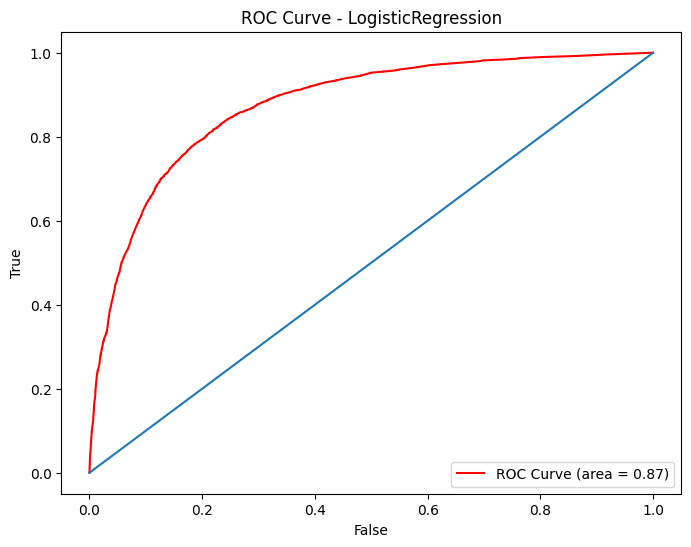

ROC AUC Score: 0.833010391615451


In [ ]:
y_proba_lg = logistic.predict_proba( X_test_scaled )[ : , 1 ]

# ROC 곡선 계산
fpr_lg, tpr_lg, thresholds_lg = roc_curve( y_test, y_proba )

# ROC 곡선 그리기
plt.figure( figsize = ( 8, 6 ) )
plt.plot( fpr_lg, tpr_lg, color = 'red', label = 'ROC Curve (area = %.2f)' % roc_auc )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False' )
plt.ylabel( 'True' )
plt.title( 'ROC Curve - LogisticRegression' )
plt.legend( loc='lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc_lg = roc_auc_score( y_test, y_proba_lg )
print( 'ROC AUC Score:', roc_auc_lg )

## LogisticRegression + GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

# 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {
    'C': [ 0.001, 0.01, 0.1, 1, 10, 100 ]  # 로지스틱 회귀의 규제 강도 파라미터 범위
}

# 그리드 서치 객체 생성
grid_search_1 = GridSearchCV( estimator = logistic,
                              param_grid = param_grid,
                              cv = 5 )

# 그리드 서치를 사용하여 모델 훈련
grid_search_1.fit( X_train_scaled, y_train )

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
# 최적의 모델 및 파라미터 출력
print( "Best Parameters:", grid_search_1.best_params_ )
print( "Best Score: ", grid_search_1.best_score_ )

best_model = grid_search_1.best_estimator_

# 테스트 데이터로 예측
y_pred = best_model.predict( X_test_scaled )

Best Parameters: {'C': 10}


In [ ]:
# 모델 평가
accuracy = accuracy_score( y_test, y_pred )
print( "Accuracy:", accuracy )

# 분류 보고서 출력
print( classification_report(y_test, y_pred ) )

# 혼동 행렬 출력
print( "Confusion Matrix :")
print( confusion_matrix( y_test, y_pred ) )

Accuracy: 0.7705463182897863
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     10276
           1       0.72      0.67      0.70      6564

    accuracy                           0.77     16840
   macro avg       0.76      0.75      0.76     16840
weighted avg       0.77      0.77      0.77     16840

Confusion Matrix :
[[8555 1721]
 [2143 4421]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.8334302382496901


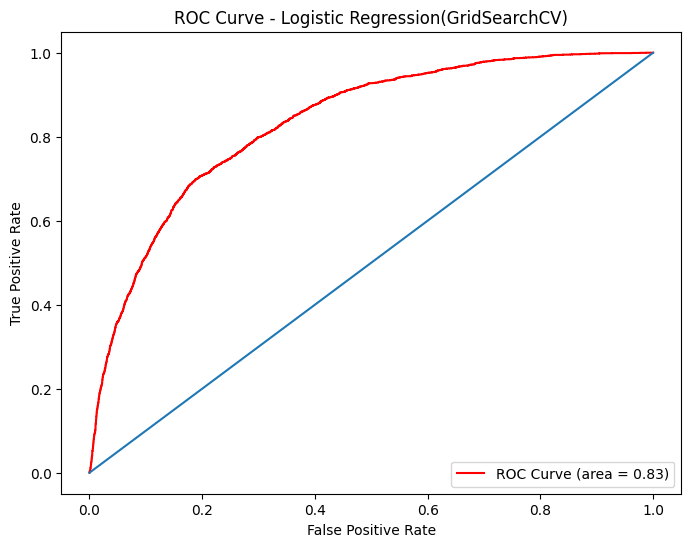

ROC AUC Score (Logistic Regression - GridSearchCV: 0.8329962590184378


In [ ]:
# 테스트 데이터에서 예측 확률 계산
y_proba_lg_gs = best_model.predict_proba( X_test_scaled )[ : , 1 ]

# ROC 곡선 계산
fpr_lg_gs, tpr_lg_gs, thresholds_lg_gs = roc_curve( y_test, y_proba_lg_gs )

# ROC 곡선 그리기
plt.figure( figsize = ( 8, 6 ) )
plt.plot( fpr_lg_gs, tpr_lg_gs, color = 'red', label = 'ROC Curve (area = %.2f)'%roc_auc_lg_gs )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title( 'ROC Curve - Logistic Regression(GridSearchCV)' )
plt.legend( loc = 'lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc_lg_gs = roc_auc_score(y_test, y_proba_lg_gs)
print('ROC AUC Score (Logistic Regression - GridSearchCV:', roc_auc_lg_gs)

## RandomForest

In [ ]:
model = RandomForestClassifier( n_estimators = 100, random_state = 42 )
model.fit( X_train_scaled, y_train )

RandomForestClassifier(random_state=42)

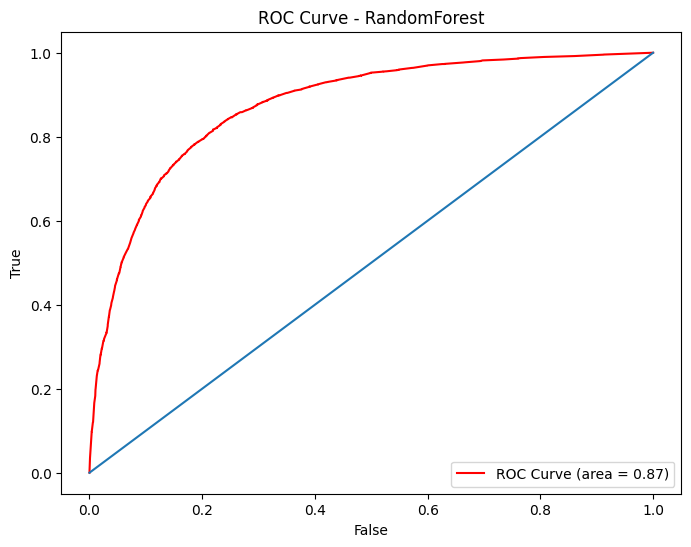

ROC AUC Score (RandomForest): 0.8745840384786674


In [ ]:
# 예측 확률 계산
y_proba = model.predict_proba( X_test_scaled )[ : , 1 ]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve( y_test, y_proba )

# ROC 곡선 그리기
plt.figure( figsize = ( 8, 6 ) )
plt.plot( fpr, tpr, color = 'red', label = 'ROC Curve (area = %.2f)' % roc_auc )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False' )
plt.ylabel( 'True' )
plt.title( 'ROC Curve - RandomForest' )
plt.legend(loc='lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc = roc_auc_score( y_test, y_proba )
print( 'ROC AUC Score (RandomForest):', roc_auc )

## RandomForest + GridSearch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 랜덤 포레스트 모델 정의
random_forest = RandomForestClassifier( )

In [ ]:
# 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [ 100, 200, 300 ],  # 의사 결정 트리 개수
    'max_depth': [ None, 10, 20, 30 ],  # 트리의 최대 깊이
    'min_samples_split': [ 2, 5, 10 ],   # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [ 1, 2, 4 ]      # 리프 노드에 있어야 할 최소 샘플 수
}

# 그리드 서치 객체 생성
grid_search_2 = GridSearchCV( estimator = random_forest, param_grid = param_grid, cv = 5 )

# 그리드 서치를 사용하여 모델 훈련
grid_search_2.fit( X_train, y_train )

In [ ]:
# 최적의 모델 및 파라미터 출력
print( "Best Parameters: ", grid_search_2.best_params_ )
print( "Best Score: ", grid_search_2.best_score_ )

best_model_2 = grid_search_2.best_estimator_

# 테스트 데이터로 예측
y_pred_2 = best_model.predict( X_test )

In [ ]:
# 모델 평가
accuracy = accuracy_score( y_test, y_pred_2 )
print( "Accuracy: ", accuracy )

# 분류 보고서 출력
print( classification_report( y_test, y_pred_2 ) )

# 혼동 행렬 출력
print( "Confusion Matrix: ")
print( confusion_matrix( y_test, y_pred_2 ) )

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.889389400945964


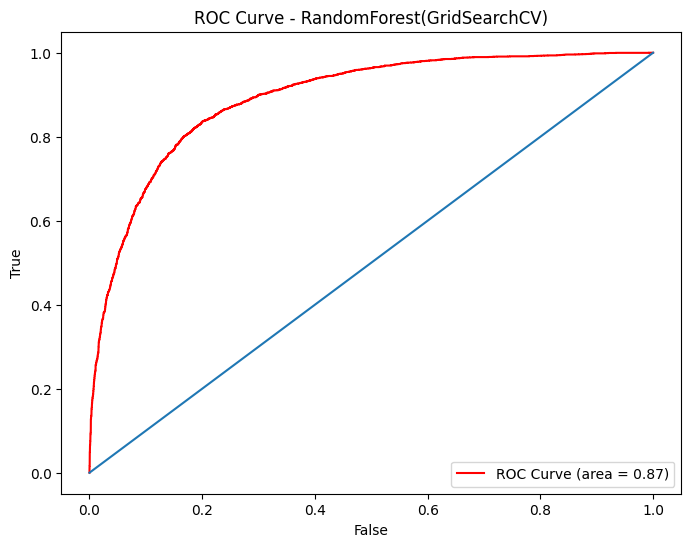

ROC AUC Score (RandomForest - GridSearchCV: 0.8923891511534694


In [ ]:
# ROC 곡선 계산
fpr_rf, tpr_rf, thresholds_rf = roc_curve( y_test, y_pred_2 )

# ROC 곡선 그리기
plt.figure( figsize = ( 8, 6 ) )
plt.plot( fpr_rf, tpr_rf, color='red', label = 'ROC Curve (area = %.2f)' % roc_auc )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False' )
plt.ylabel( 'True' )
plt.title( 'ROC Curve - RandomForest(GridSearchCV)' )
plt.legend( loc = 'lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc_rf = roc_auc_score( y_test, y_pred_2 )
print('ROC AUC Score (RandomForest - GridSearchCV: ', roc_auc_rf )

## RandomForest + GridSearch + XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 테스트 데이터로 예측
y_pred_2 = best_model_2.predict( X_test )

In [ ]:
# 랜덤 포레스트 모델 평가
rf_accuracy = accuracy_score( y_test, y_pred_2 )
print( "Random Forest Accuracy: ", rf_accuracy )

Random Forest Accuracy:  0.8169833729216152


In [ ]:
# XGBoost 모델 정의
xgb_classifier = XGBClassifier( )

# XGBoost 모델 훈련
xgb_classifier.fit( X_train, y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 테스트 데이터로 예측
xgb_y_pred = xgb_classifier.predict( X_test )

# XGBoost 모델 평가
xgb_accuracy = accuracy_score( y_test, xgb_y_pred )
print( "XGBoost Accuracy: ", xgb_accuracy )

XGBoost Accuracy:  0.8187648456057007


# 5. 팀과 모델링 결과 발표후 고성능 모델 선정

- < 결과 >
  1. LogisticRegression
    - 0.833
  2. LogisticRegression + GridSearch
    - 0.833
  3. RandomForest
    - 0.874
  4. RandomForest + GridSearch
    - 0.889
  5. RandomForest + GridSearch + XGBoost
    - 0.8187
  6. DecisionTree
    - 0.732
  7. DecisionTree + GridSearch
    - 0.865
  8. DecisionTree + GridSearch + XGBoost
    - 0.8187
  9. DecisionTree + GridSearch + XGBoost + CatBoost
    - 0.8211
  10. DecisionTree + GridSearch + XGBoost
    - 0.894
  11. DecisionTree + GridSearch + CatBoost
    - 0.826



- < 가장 높은 성능의 모델 선택>
  - DecisionTree + GridSearch + XGBoost( K-fold 교차 검증 포함 )
    - 모델의 성능이 가장 높음
    - 이 모델을 토대로 학습을 시켜 결과를 제출

DecisionTree + GridSearch + XGBoost( K-fold 교차 검증 포함 )

# 6. 선택된 모델로 학습 진행

## RandomForest + GridSearch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 랜덤 포레스트 모델 정의
random_forest = RandomForestClassifier( )

In [ ]:
# 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [ 100, 200, 300 ],  # 의사 결정 트리 개수
    'max_depth': [ None, 10, 20, 30 ],  # 트리의 최대 깊이
    'min_samples_split': [ 2, 5, 10 ],   # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [ 1, 2, 4 ]      # 리프 노드에 있어야 할 최소 샘플 수
}

# 그리드 서치 객체 생성
grid_search_2 = GridSearchCV( estimator = random_forest, param_grid = param_grid, cv = 5 )

# 그리드 서치를 사용하여 모델 훈련
grid_search_2.fit( X_train, y_train )

In [ ]:
# 최적의 모델 및 파라미터 출력
print( "Best Parameters: ", grid_search_2.best_params_ )
print( "Best Score: ", grid_search_2.best_score_ )

best_model_2 = grid_search_2.best_estimator_

# 테스트 데이터로 예측
y_pred_2 = best_model.predict( X_test )

In [ ]:
# 모델 평가
accuracy = accuracy_score( y_test, y_pred_2 )
print( "Accuracy: ", accuracy )

# 분류 보고서 출력
print( classification_report( y_test, y_pred_2 ) )

# 혼동 행렬 출력
print( "Confusion Matrix: ")
print( confusion_matrix( y_test, y_pred_2 ) )

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.889389400945964


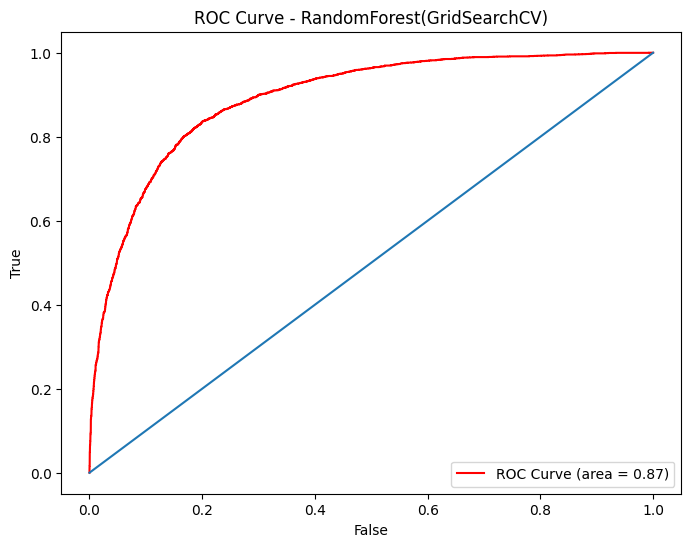

ROC AUC Score (RandomForest - GridSearchCV: 0.8923891511534694


In [ ]:
# ROC 곡선 계산
fpr_rf, tpr_rf, thresholds_rf = roc_curve( y_test, y_pred_2 )

# ROC 곡선 그리기
plt.figure( figsize = ( 8, 6 ) )
plt.plot( fpr_rf, tpr_rf, color='red', label = 'ROC Curve (area = %.2f)' % roc_auc )
plt.plot( [ 0, 1 ], [ 0, 1 ] )
plt.xlabel( 'False' )
plt.ylabel( 'True' )
plt.title( 'ROC Curve - RandomForest(GridSearchCV)' )
plt.legend( loc = 'lower right' )
plt.show( )

# ROC AUC 스코어 계산
roc_auc_rf = roc_auc_score( y_test, y_pred_2 )
print('ROC AUC Score (RandomForest - GridSearchCV: ', roc_auc_rf )

## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### 코드

In [ ]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# XGBoost 모델 초기화
model_xgb = XGBClassifier(random_state=42)
tprs_xgb = []
fprs_xgb = []
auc_scores_xgb = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train_scaled, y_train)):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    print(f"Fold {fold + 1} - Train size: {len(train_index)}, Test size: {len(test_index)}")

    model_xgb.fit(X_train_fold, y_train_fold)

    y_proba_xgb = model_xgb.predict_proba(X_val_fold)[:, 1]

    fpr_xgb, tpr_xgb, _ = roc_curve(y_val_fold, y_proba_xgb)

    auc_score_xgb = roc_auc_score(y_val_fold, y_proba_xgb)

    tprs_xgb = np.append(tprs_xgb, tpr_xgb)
    fprs_xgb = np.append(fprs_xgb, fpr_xgb)
    auc_scores_xgb = np.append(auc_scores_xgb, auc_score_xgb)

mean_auc_xgb = np.mean(auc_scores_xgb)
print(mean_auc_xgb)


Fold 1 - Train size: 26944, Test size: 6736
Fold 2 - Train size: 26944, Test size: 6736
Fold 3 - Train size: 26944, Test size: 6736
Fold 4 - Train size: 26944, Test size: 6736
Fold 5 - Train size: 26944, Test size: 6736
0.8944244503652788


## CSV 제출

In [ ]:
train      = pd.read_csv( '/content/drive/MyDrive/멋사_데이터분석스쿨/9.파이널_프로젝트/Binary Classification with a Tabular Reservation Cancellation Dataset/train.csv' )
test       = pd.read_csv( '/content/drive/MyDrive/멋사_데이터분석스쿨/9.파이널_프로젝트/Binary Classification with a Tabular Reservation Cancellation Dataset/test.csv' )
submission = pd.read_csv( '/content/drive/MyDrive/멋사_데이터분석스쿨/9.파이널_프로젝트/Binary Classification with a Tabular Reservation Cancellation Dataset/sample_submission.csv' )

In [ ]:
# XGBoost 예측 결과 저장
xgb_submission = pd.DataFrame( {
    "id": test[ "id" ],
    "booking_status" : y_proba_xgb( test_data.drop( columns = [ 'id' ] ) )
} )

xgb_submission.to_csv( "xgb_submission.csv", index = False )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# 결과를 CSV 파일로 저장
results.to_csv( 'grid_search_results_1_LogisticRegression.csv', index = False )

# 7. 추가 학습진행

- 추가 학습 진행은 아래의 코드에서 따로 진행
- [모델링 추가 학습 진행](https://colab.research.google.com/drive/1wwJPrWH88Qfr8pH3wT5BX0rHtilOLyuv#scrollTo=vLxHfaaoMIlE)